## Population of private cars and motorcycles in Singapore
> Nabil Ridhwanshah Bin Rosli

Questions that I hope to answer:
-   Are there more private cars or motorcycles in Singapore?
-   What is the trend of private cars and motorcycles in Singapore?
-   Are there lower registrations of vehicles in Singapore during COVID (between 2019-2020)?
    -   If yes, how much lower compared to other years?
    -   If no, if there is any lower registrations, what might be the reason?

In [862]:
import numpy as np
import matplotlib.pyplot as plt

In [863]:
# Read the data
# Create a data type array with the column names

dtype = ['int32', 'U50', 'U50', 'int32']
accidents_dtype = ['int32', 'U50', 'U50', 'U50', 'int32']

def read_data_from_csv(filename, dtype, delimiter=',', names=True):
    return np.genfromtxt(filename, dtype=dtype, delimiter=delimiter, names=names)

# Annual motor vehicle population by vehicle type
data = read_data_from_csv("./data/annual-motor-vehicle-population-by-vehicle-type.csv", dtype)

# Road traffic conditions data
road_traffic_conditions_data = read_data_from_csv("./data/road_traffic_condition.csv", ['int32', 'float', 'float', 'int32'])

# Accidents in Singapore
accidents_data = read_data_from_csv("./data/causes-of-accidents-by-severity-of-injury-sustained.csv", dtype=accidents_dtype)



def extract_data_by_type_or_category(t, c=''):
    if(len(c) == 0):
        return data[data['type'] == t]
    return data[np.logical_and(data['category'] == c, data['type'] == t)]

data_private_cars = extract_data_by_type_or_category('Private cars')
data_motorcycles = extract_data_by_type_or_category('Motorcycles and Scooters')
data_taxis = extract_data_by_type_or_category('Taxis', 'Taxis')



In [864]:
# Calculate min, max, mean, median, std and print them out
min_private_cars = np.min(data_private_cars['number'])
max_private_cars = np.max(data_private_cars['number'])
mean_private_cars = np.mean(data_private_cars['number'])
median_private_cars = np.median(data_private_cars['number'])
std_private_cars = np.std(data_private_cars['number'])

print("Private cars")
print("Min: ", min_private_cars)
print("Max: ", max_private_cars)
print("Mean: ", mean_private_cars)
print("Median: ", median_private_cars)
print("Std: ", std_private_cars)

min_motorcycles = np.min(data_motorcycles['number'])
max_motorcycles = np.max(data_motorcycles['number'])
mean_motorcycles = np.mean(data_motorcycles['number'])
median_motorcycles = np.median(data_motorcycles['number'])
std_motorcycles = np.std(data_motorcycles['number'])

print("")

print("Motorcycles")
print("Min: ", min_motorcycles)
print("Max: ", max_motorcycles)
print("Mean: ", mean_motorcycles)
print("Median: ", median_motorcycles)
print("Std: ", std_motorcycles)


Private cars
Min:  401638
Max:  540063
Mean:  497651.0
Median:  510213.5
Std:  39059.782067044354

Motorcycles
Min:  136842
Max:  147282
Mean:  142848.6875
Median:  143282.5
Std:  2728.477934644836


In [865]:
# The function below is used to extract the data for a given year and the types of vehicles
def extract_data_by_year(year, types):
    extracted_data = {}
    for label in types:
        value_to_push = data[np.logical_and(data['year'] == year, data['type'] == label)]['number']
        if(len(value_to_push) > 0):
            extracted_data[label] = value_to_push[0]

    return extracted_data.keys(), extracted_data.values()

#   Pie chart of vehicles by type in 2020

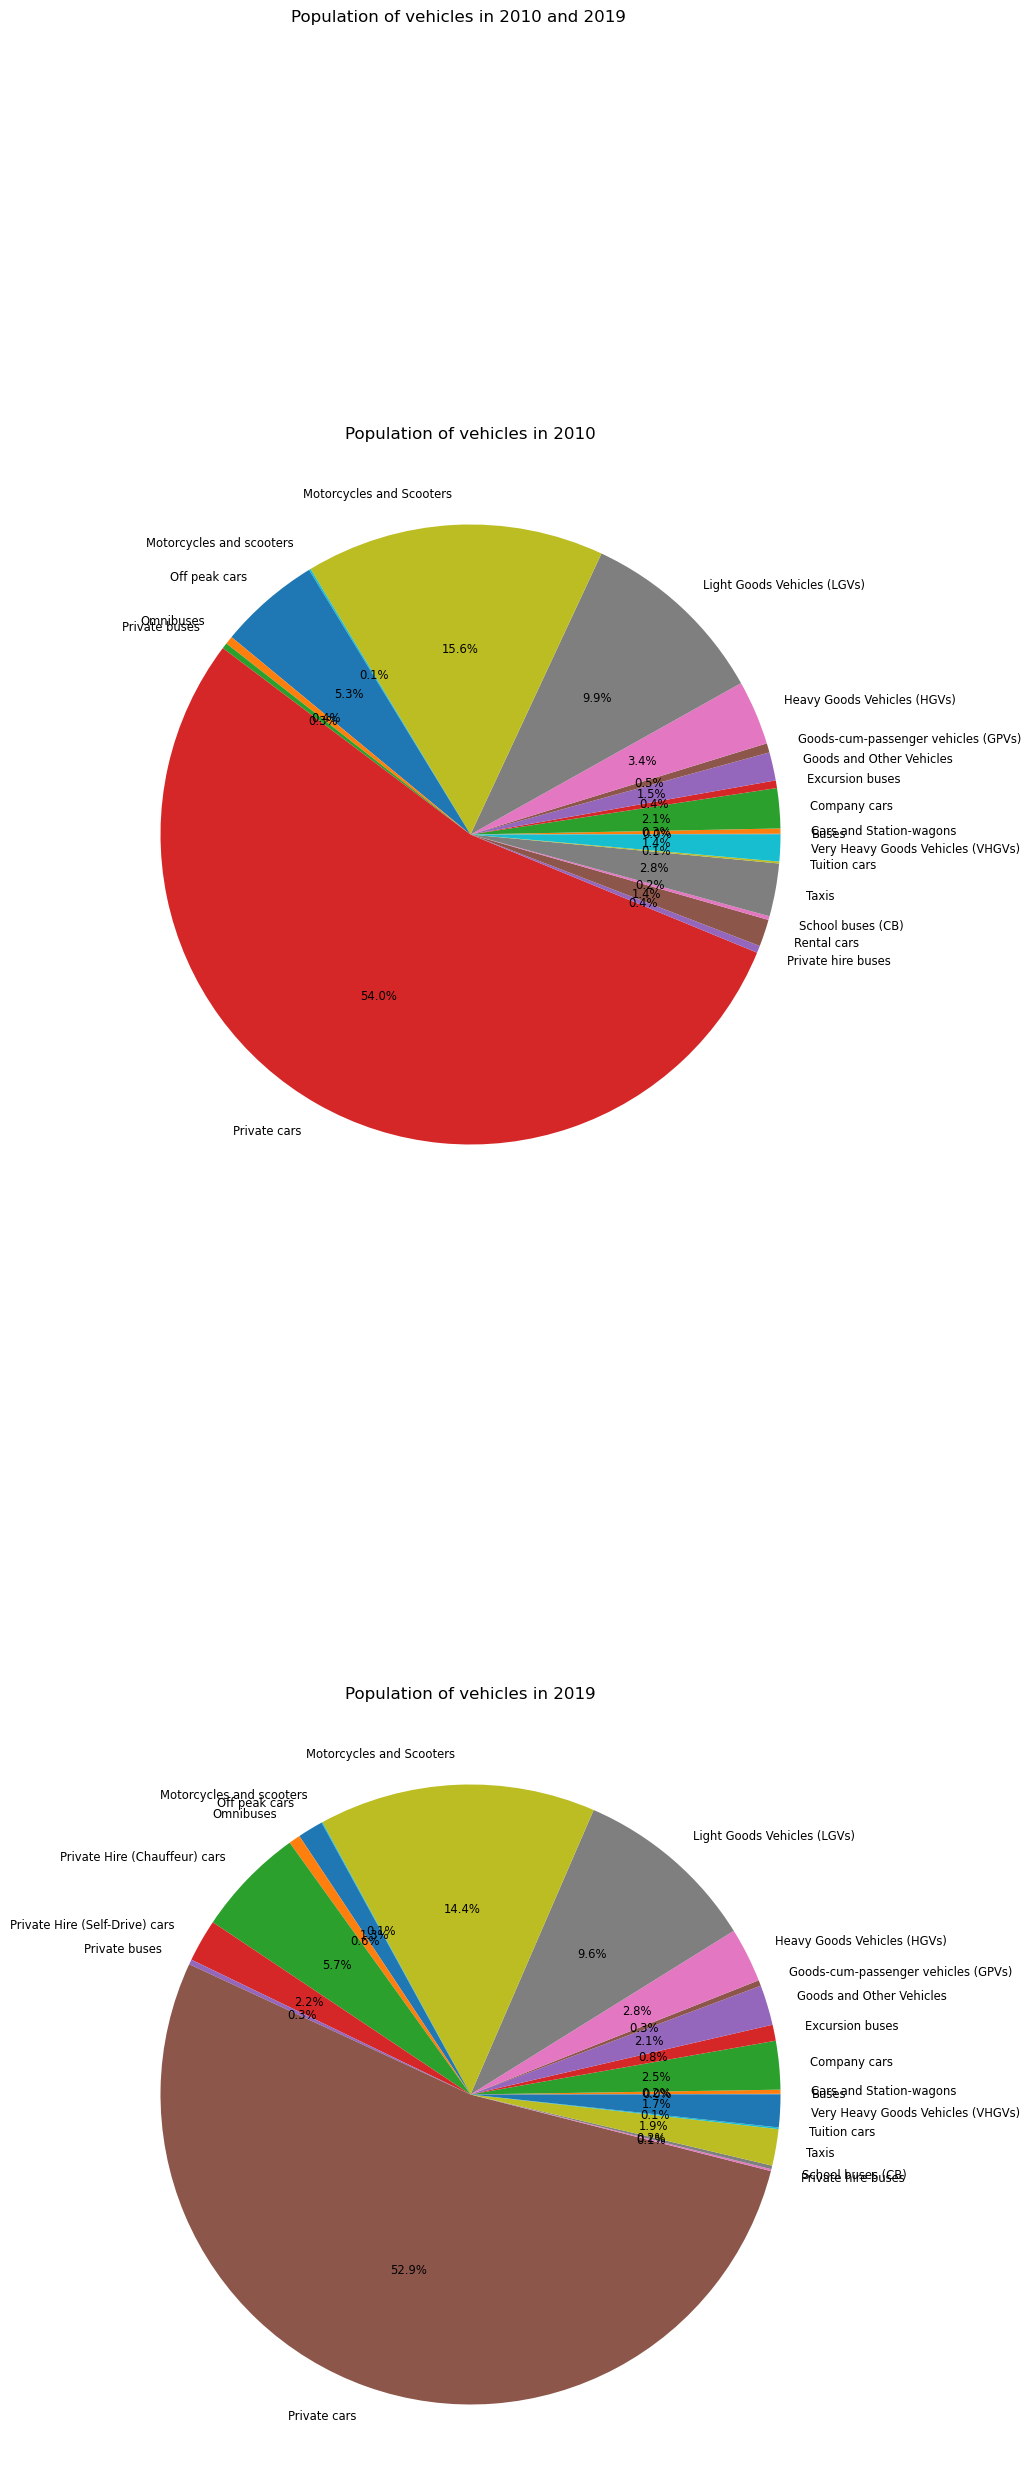

In [866]:
fig, ax = plt.subplots(2,1, figsize=(10,30));


unique_vehicle_types = np.unique(data['type'])
labels, values = extract_data_by_year(2010, unique_vehicle_types)

# Plot the data
ax[0].set_title("Population of vehicles in 2010")
ax[0].pie(values, labels=labels, autopct='%1.1f%%', textprops={'size': 'smaller'})

# Extract data according to the year and also the type
unique_vehicle_types = np.unique(data['type'])
labels, values = extract_data_by_year(2019, unique_vehicle_types)

ax[1].set_title("Population of vehicles in 2019")
ax[1].pie(values, labels=labels, autopct='%1.1f%%', textprops={'size': 'smaller'})

plt.suptitle("Population of vehicles in 2010 and 2019")

plt.show()

### Visual based EDA (ECDF Curve)

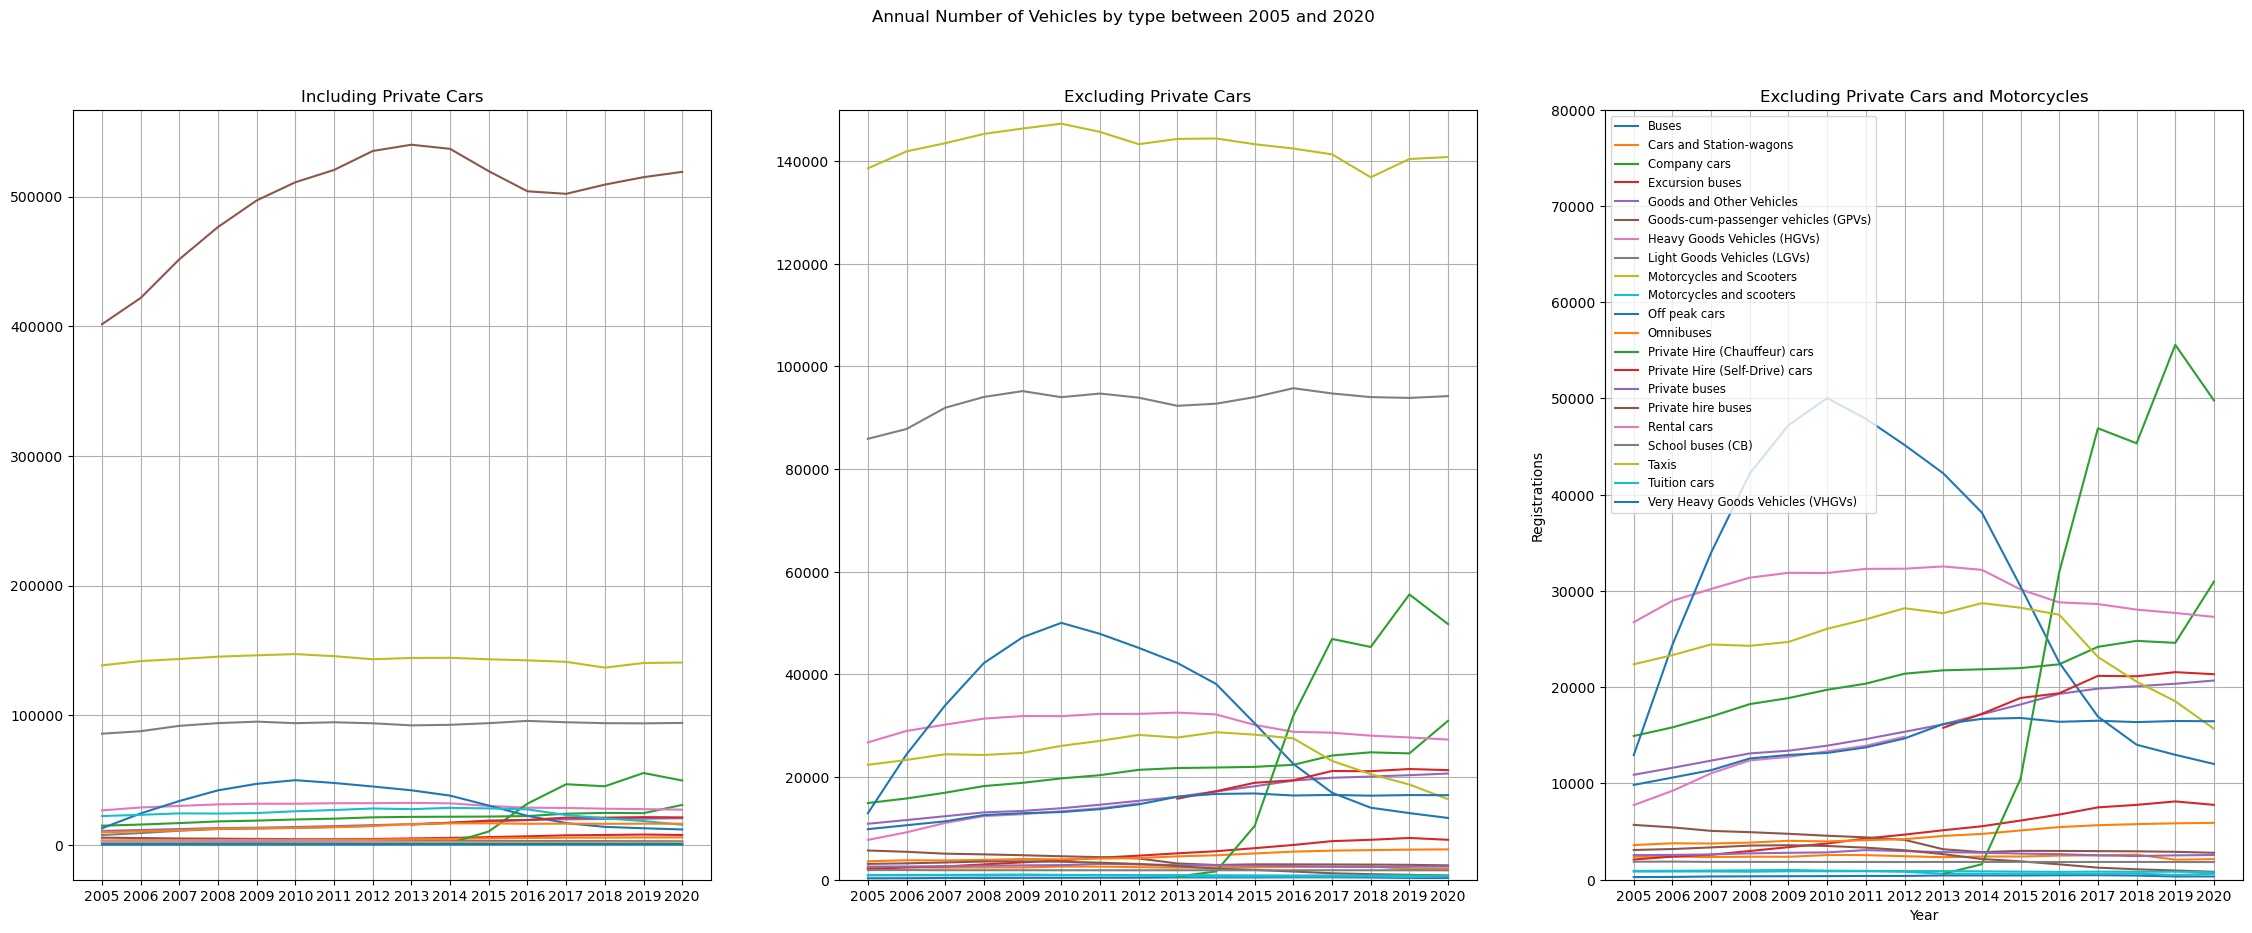

In [867]:
# Plot line graph
# plt.figure(figsize=(15,20))

# plt.grid()

# Make a list

# Make a subplot for 1x2 grid
fig, ax = plt.subplots(1,3, figsize=(28, 10))

line_plot_items = {}

for t in unique_vehicle_types:
    line_plot_items[t] = extract_data_by_type_or_category(t)

for key, value in line_plot_items.items():
    if(key != 'Private cars'):
        ax[0].plot(value['year'], value['number'], label=key)
        ax[1].plot(value['year'], value['number'], label=key)
        ax[2].plot(value['year'], value['number'], label=key)
    else:
        ax[0].plot(value['year'], value['number'], label=key)
# plt.plot(data_private_cars['year'], data_private_cars['number'], label='Private Cars')
# plt.plot(data_motorcycles['year'], data_motorcycles['number'], label='Motorcycles')
# plt.plot(data_taxis['year'], data_taxis['number'], label='Taxis')

ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[1].set_ylim(0, 150000)
ax[2].set_ylim(0, 80000)

plt.xlabel('Year')
plt.ylabel('Registrations')
# plt.title('Annual Private Cars, Motorcycles and Taxis Registrations')

t = np.array(list(range(2005, 2021)))

ax[0].set_xticks(t)
ax[0].set_title('All Types')

ax[1].set_xticks(t)
ax[1].set_title('Excluding Private Cars')

ax[2].set_xticks(t)
ax[2].set_title('Excluding Private Cars and Motorcycles')

ax[2].legend(fontsize='small', loc='best')
plt.suptitle('Annual Number of Vehicles by type between 2005 and 2020')

plt.show()


### What does these two graphs tell us?
-   The number of registrations of private cars and motorcycles are increasing over the years. However 
    -   there is a drop of registrations for cars between 2014 and 2016. (^)
    -   there is a drop of registrations for motorcycles between 2017 and 2018. (^)
-   The number of registrations of private cars are higher than motorcycles.
-   The increase between 2019 to 2020 for both cars and motorcycles are lower compared to other years. This is expected as the COVID-19 pandemic has affected the economy of Singapore (*)



### Assumptions?
(^) This is expected as the COVID-19 pandemic has affected the economy of Singapore. Less people are working in office and thus less people are buying vehicles.

(*) I am not one to assume that this may be due to COE prices. However, I am not sure if this is the case. I will need to do more research on this. (Maybe another data set?)

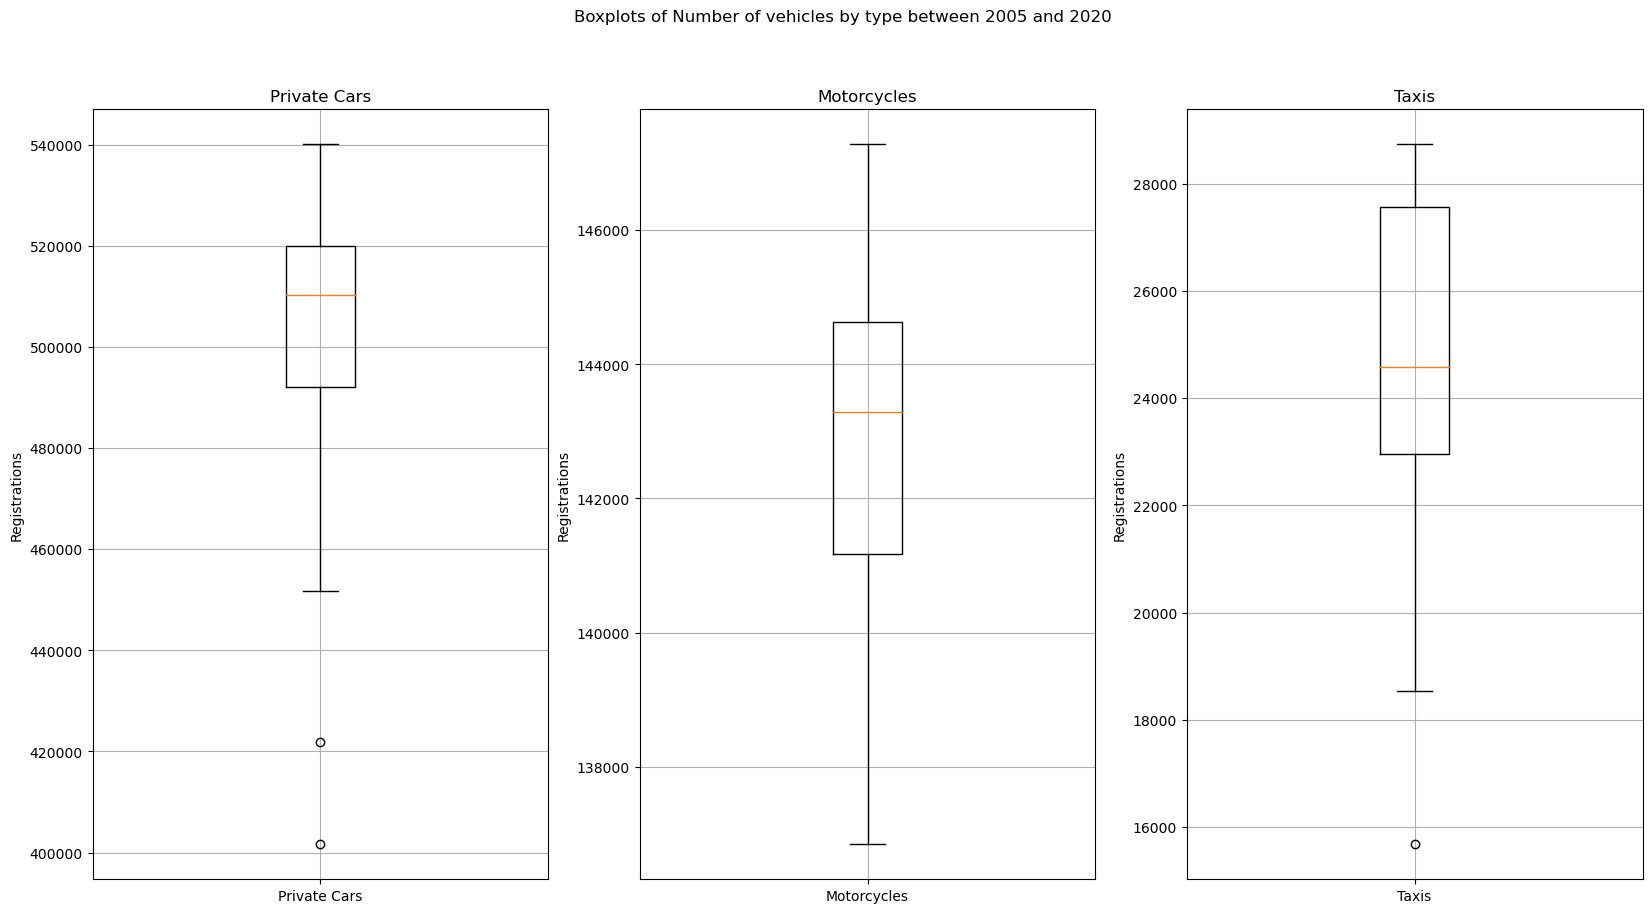

In [868]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].set_title("Private Cars")
ax[1].set_title("Motorcycles")
ax[2].set_title("Taxis")

ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].boxplot(data_private_cars['number'], labels=['Private Cars'])
ax[1].boxplot(data_motorcycles['number'], labels=['Motorcycles'])
ax[2].boxplot(data_taxis['number'], labels=['Taxis'])

ax[0].set_ylabel('Registrations')
ax[1].set_ylabel('Registrations')
ax[2].set_ylabel('Registrations')

plt.suptitle('Boxplots of Number of vehicles by type between 2005 and 2020')

# plt.boxplot([data_motorcycles['number'], data_private_cars['number'], data_taxis['number']], labels=['Motorcycles', 'Private Cars', 'Taxis'])
# plt.grid()
# plt.title('Boxplot of Vehicle Registrations between 2005 and 2022')
# plt.ylabel('Registrations')
plt.show()

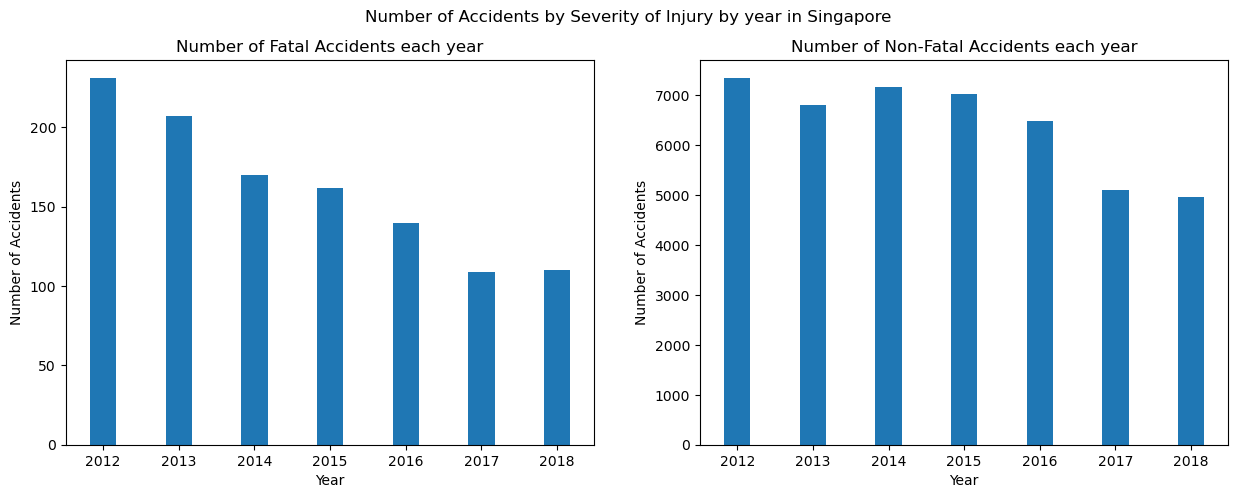

In [869]:
def extract_fatal_and_injury_by_year(year):
    accidents_fatal = accidents_data[np.logical_and(accidents_data['accident_classification'] == 'FATAL', accidents_data['year'] == year)]
    accidents_injury = accidents_data[np.logical_and(accidents_data['accident_classification'] == 'INJURY', accidents_data['year'] == year)]

    accidents_fatal_sum = accidents_fatal['number_of_accidents'].sum()
    accidents_injury_sum = accidents_injury['number_of_accidents'].sum()

    return [accidents_fatal_sum, accidents_injury_sum]

# Use numpy to generate 2012 to 2018
years = np.arange(2012, 2019)

labels = years
fatal_datapoints = []
injury_datapoints = []

# Loop through each years and extract the data
for year in years:
    fatal, injury = extract_fatal_and_injury_by_year(year)
    fatal_datapoints.append(fatal)
    injury_datapoints.append(injury)



# x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(1,2, figsize=(15, 5))
ax[0].bar(years, fatal_datapoints, width, label='Fatal')
ax[1].bar(years, injury_datapoints, width, label='Injury')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax[0].set_title('Number of Fatal Accidents each year')
ax[1].set_title('Number of Non-Fatal Accidents each year')

ax[0].set_ylabel('Number of Accidents')
ax[0].set_xlabel('Year')

ax[1].set_ylabel('Number of Accidents')
ax[1].set_xlabel('Year')

# ax[0].set_xticks(x, labels)
# ax[1].set_xticks(x, labels)
# ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

plt.suptitle('Number of Accidents by Severity of Injury by year in Singapore')

plt.show()

Text(0.5, 0.98, 'Average speeds of vehicles on roads and expressways by year in Singapore')

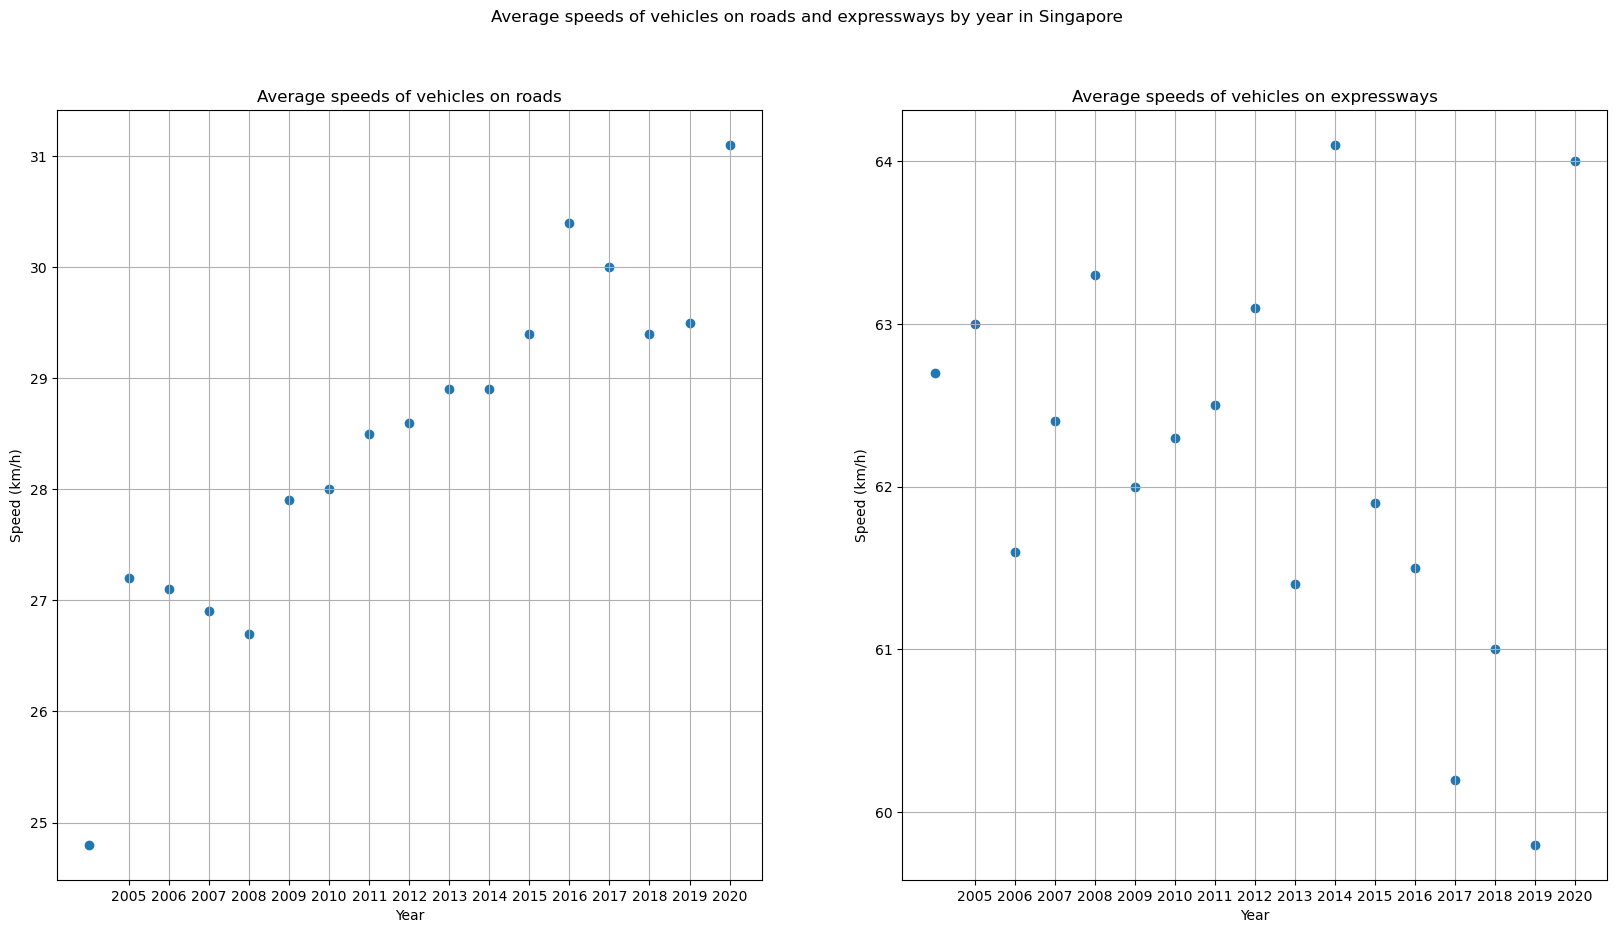

In [870]:
fig, ax = plt.subplots(1,2, figsize=(20, 10))

ax[0].set_title('Average speeds of vehicles on roads')
ax[1].set_title('Average speeds of vehicles on expressways')

ax[0].grid()
ax[1].grid()

ax[0].set_xlabel('Year')
ax[0].set_ylabel('Speed (km/h)')

ax[1].set_xlabel('Year')
ax[1].set_ylabel('Speed (km/h)')

ax[0].scatter(road_traffic_conditions_data['year'], road_traffic_conditions_data['ave_speed_arterial_roads'], label='Fatal')
ax[1].scatter(road_traffic_conditions_data['year'], road_traffic_conditions_data['ave_speed_expressway'], label='Fatal')

ax[0].set_xticks(t)
ax[1].set_xticks(t)

plt.suptitle('Average speeds of vehicles on roads and expressways by year in Singapore')

(array([2., 1., 0., 0., 1., 0., 3., 1., 2., 7.]),
 array([238300., 244870., 251440., 258010., 264580., 271150., 277720.,
        284290., 290860., 297430., 304000.]),
 <BarContainer object of 10 artists>)

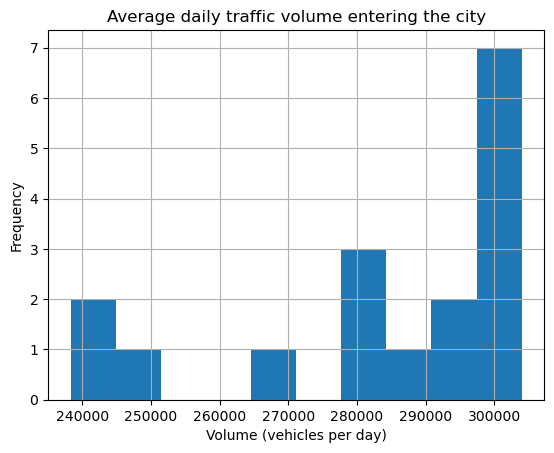

In [871]:
plt.grid()
plt.title('Average daily traffic volume entering the city')
plt.xlabel('Volume (vehicles per day)')
plt.ylabel('Frequency')
plt.hist(road_traffic_conditions_data['ave_daily_traffic_volume_entering_city'], bins=10)